# Breast Cancer Prediction System - Model Development

## Project Overview
This notebook develops a machine learning model to predict whether a breast tumor is benign or malignant using the Breast Cancer Wisconsin (Diagnostic) dataset.

**Algorithm**: Logistic Regression  
**Selected Features**: radius_mean, texture_mean, perimeter_mean, compactness_mean, concavity_mean  
**Model Persistence**: Joblib

---

## 1. Import Required Libraries

In [7]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Model persistence
import joblib

# System utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Load and Explore the Dataset

In [8]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target

# Map target values: 0=malignant, 1=benign
df['diagnosis_label'] = df['diagnosis'].map({0: 'malignant', 1: 'benign'})

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (569, 32)

First 5 rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,diagnosis_label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [9]:
# Dataset information
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [10]:
# Statistical summary
print("Statistical Summary:")
print("="*50)
df.describe()

Statistical Summary:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# Check for missing values
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values:
No missing values found

Total missing values: 0


Target Variable Distribution:
diagnosis_label
benign       357
malignant    212
Name: count, dtype: int64

Percentage Distribution:
diagnosis_label
benign       62.741652
malignant    37.258348
Name: proportion, dtype: float64


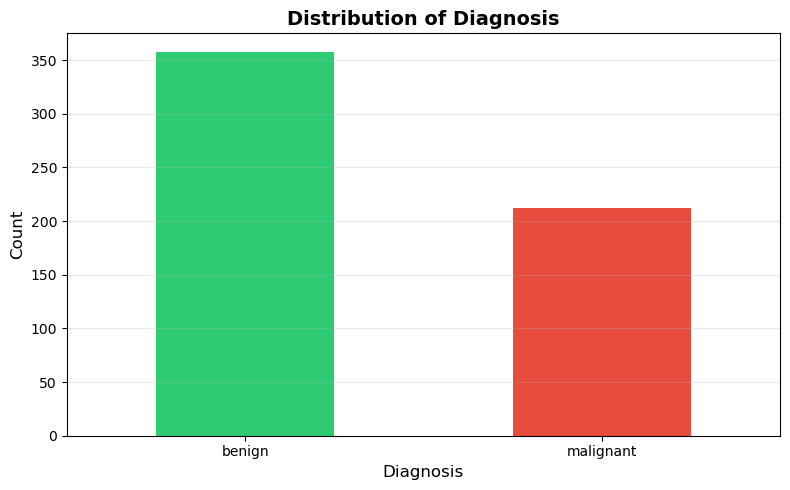

In [12]:
# Target variable distribution
print("Target Variable Distribution:")
print("="*50)
print(df['diagnosis_label'].value_counts())
print(f"\nPercentage Distribution:")
print(df['diagnosis_label'].value_counts(normalize=True) * 100)

# Visualization
plt.figure(figsize=(8, 5))
df['diagnosis_label'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Feature Selection

Selected 5 features from the recommended list:
1. radius_mean
2. texture_mean
3. perimeter_mean
4. compactness_mean
5. concavity_mean

In [13]:
# Define selected features
SELECTED_FEATURES = [
    'mean radius',
    'mean texture',
    'mean perimeter',
    'mean compactness',
    'mean concavity'
]

# Extract features and target
X = df[SELECTED_FEATURES]
y = df['diagnosis']

print("Selected Features:")
print("="*50)
for i, feature in enumerate(SELECTED_FEATURES, 1):
    print(f"{i}. {feature}")

print(f"\nFeature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")

Selected Features:
1. mean radius
2. mean texture
3. mean perimeter
4. mean compactness
5. mean concavity

Feature Matrix Shape: (569, 5)
Target Vector Shape: (569,)


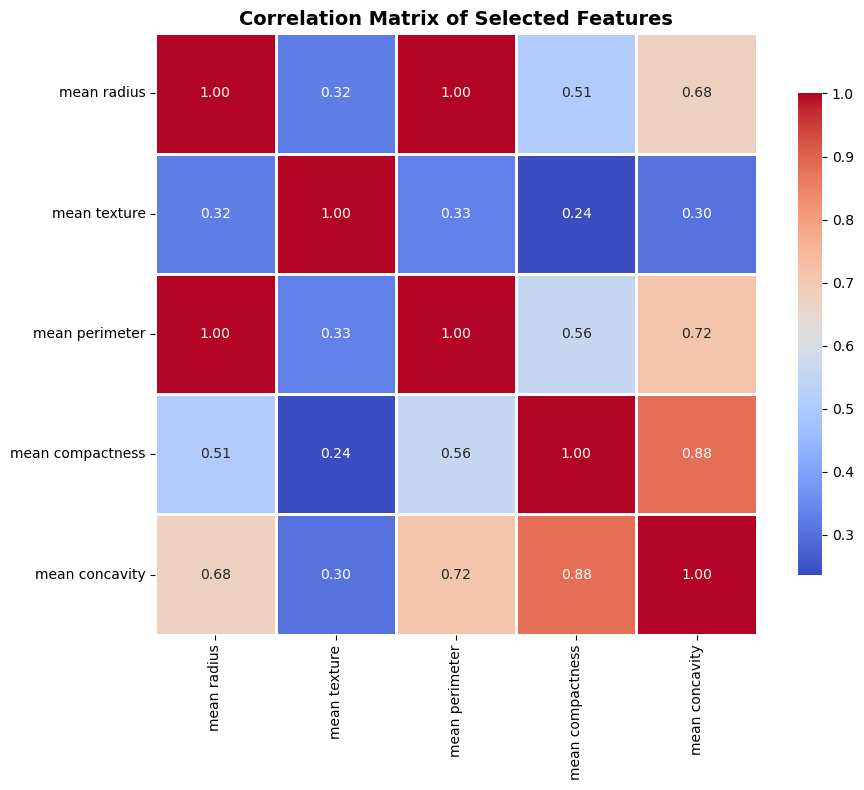


Correlation Analysis:
                  mean radius  mean texture  mean perimeter  mean compactness  \
mean radius          1.000000      0.323782        0.997855          0.506124   
mean texture         0.323782      1.000000        0.329533          0.236702   
mean perimeter       0.997855      0.329533        1.000000          0.556936   
mean compactness     0.506124      0.236702        0.556936          1.000000   
mean concavity       0.676764      0.302418        0.716136          0.883121   

                  mean concavity  
mean radius             0.676764  
mean texture            0.302418  
mean perimeter          0.716136  
mean compactness        0.883121  
mean concavity          1.000000  


In [14]:
# Correlation analysis of selected features
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Selected Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelation Analysis:")
print("="*50)
print(correlation_matrix)

## 4. Data Preprocessing

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print("Data Split Summary:")
print("="*50)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set diagnosis distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTesting set diagnosis distribution:")
print(pd.Series(y_test).value_counts())

Data Split Summary:
Training set size: 455 samples (80.0%)
Testing set size: 114 samples (20.0%)

Training set diagnosis distribution:
diagnosis
1    285
0    170
Name: count, dtype: int64

Testing set diagnosis distribution:
diagnosis
1    72
0    42
Name: count, dtype: int64


In [16]:
# Feature Scaling (mandatory for distance-based models and improves logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Applied:")
print("="*50)
print(f"Scaler: StandardScaler (mean=0, std=1)")
print(f"\nOriginal feature ranges (training set):")
print(X_train.describe().loc[['min', 'max']])
print(f"\nScaled feature statistics (training set):")
print(pd.DataFrame(X_train_scaled, columns=SELECTED_FEATURES).describe().loc[['mean', 'std']])

Feature Scaling Applied:
Scaler: StandardScaler (mean=0, std=1)

Original feature ranges (training set):
     mean radius  mean texture  mean perimeter  mean compactness  \
min        6.981          9.71           43.79           0.01938   
max       28.110         39.28          188.50           0.34540   

     mean concavity  
min          0.0000  
max          0.4268  

Scaled feature statistics (training set):
       mean radius  mean texture  mean perimeter  mean compactness  \
mean -4.337434e-15  2.240942e-15   -7.437274e-16     -2.775802e-15   
std   1.001101e+00  1.001101e+00    1.001101e+00      1.001101e+00   

      mean concavity  
mean   -7.046866e-16  
std     1.001101e+00  


## 5. Model Training

In [17]:
# Initialize Logistic Regression model
model = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced'  # Handle class imbalance
)

# Train the model
print("Training Logistic Regression Model...")
print("="*50)
model.fit(X_train_scaled, y_train)
print("✓ Model training completed successfully")

# Display model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({
    'Feature': SELECTED_FEATURES,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(coefficients.to_string(index=False))
print(f"\nIntercept: {model.intercept_[0]:.4f}")

Training Logistic Regression Model...
✓ Model training completed successfully

Model Coefficients:
         Feature  Coefficient
     mean radius    -1.681105
  mean perimeter    -1.600859
  mean concavity    -1.227281
    mean texture    -1.076365
mean compactness    -0.890991

Intercept: 0.1687


In [18]:
# Cross-validation
print("Cross-Validation Results:")
print("="*50)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-Validation Results:
Cross-validation scores: [0.91208791 0.96703297 0.89010989 0.94505495 0.92307692]
Mean CV Accuracy: 0.9275 (+/- 0.0531)


## 6. Model Evaluation

In [19]:
# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Model Predictions Generated")
print("="*50)
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Testing predictions shape: {y_test_pred.shape}")

Model Predictions Generated
Training predictions shape: (455,)
Testing predictions shape: (114,)


In [20]:
# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Calculate and display evaluation metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Performance Metrics:")
    print("="*50)
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Evaluate on training set
train_metrics = evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on testing set
test_metrics = evaluate_model(y_test, y_test_pred, "Testing Set")


Training Set Performance Metrics:
Accuracy:  0.9297 (92.97%)
Precision: 0.9534 (95.34%)
Recall:    0.9333 (93.33%)
F1-Score:  0.9433 (94.33%)

Testing Set Performance Metrics:
Accuracy:  0.9123 (91.23%)
Precision: 0.9559 (95.59%)
Recall:    0.9028 (90.28%)
F1-Score:  0.9286 (92.86%)


In [21]:
# Detailed classification report
print("\nDetailed Classification Report (Test Set):")
print("="*50)
print(classification_report(y_test, y_test_pred, 
                          target_names=['Malignant', 'Benign'],
                          digits=4))


Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

   Malignant     0.8478    0.9286    0.8864        42
      Benign     0.9559    0.9028    0.9286        72

    accuracy                         0.9123       114
   macro avg     0.9019    0.9157    0.9075       114
weighted avg     0.9161    0.9123    0.9130       114



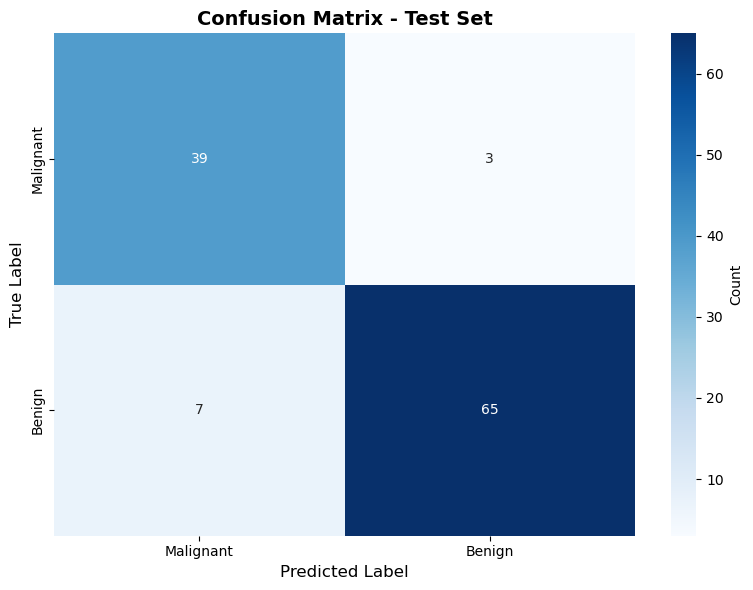


Confusion Matrix Analysis:
True Negatives (TN): 39
False Positives (FP): 3
False Negatives (FN): 7
True Positives (TP): 65


In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print("="*50)
print(f"True Negatives (TN): {cm[0][0]}")
print(f"False Positives (FP): {cm[0][1]}")
print(f"False Negatives (FN): {cm[1][0]}")
print(f"True Positives (TP): {cm[1][1]}")

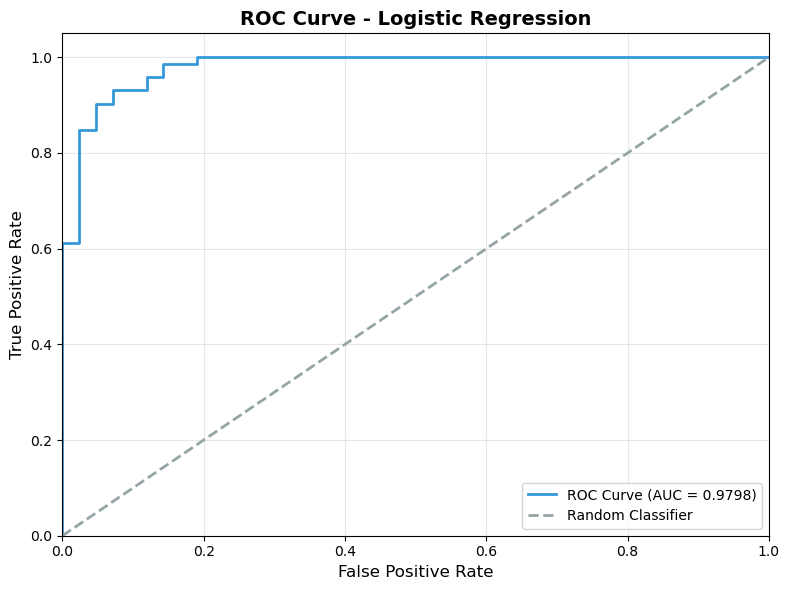


ROC AUC Score: 0.9798


In [23]:
# ROC Curve and AUC Score
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#3498db', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='#95a5a6', linestyle='--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

## 7. Model Persistence (Save Model)

In [24]:
# Save the trained model and scaler using Joblib
model_filename = 'breast_cancer_model.pkl'
scaler_filename = 'scaler.pkl'
feature_names_filename = 'feature_names.pkl'

# Save model
joblib.dump(model, model_filename)
print(f"✓ Model saved as: {model_filename}")

# Save scaler
joblib.dump(scaler, scaler_filename)
print(f"✓ Scaler saved as: {scaler_filename}")

# Save feature names for consistency
joblib.dump(SELECTED_FEATURES, feature_names_filename)
print(f"✓ Feature names saved as: {feature_names_filename}")

# Verify files were created
import os
print("\nSaved Files:")
print("="*50)
for filename in [model_filename, scaler_filename, feature_names_filename]:
    if os.path.exists(filename):
        file_size = os.path.getsize(filename) / 1024  # Size in KB
        print(f"✓ {filename} ({file_size:.2f} KB)")
    else:
        print(f"✗ {filename} - NOT FOUND")

✓ Model saved as: breast_cancer_model.pkl
✓ Scaler saved as: scaler.pkl
✓ Feature names saved as: feature_names.pkl

Saved Files:
✓ breast_cancer_model.pkl (0.91 KB)
✓ scaler.pkl (1.09 KB)
✓ feature_names.pkl (0.10 KB)


## 8. Model Reloading and Verification

In [25]:
# Load the saved model and scaler
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_features = joblib.load(feature_names_filename)

print("Model Reloading Verification:")
print("="*50)
print(f"✓ Model loaded successfully")
print(f"✓ Scaler loaded successfully")
print(f"✓ Feature names loaded successfully")
print(f"\nLoaded Features: {loaded_features}")

Model Reloading Verification:
✓ Model loaded successfully
✓ Scaler loaded successfully
✓ Feature names loaded successfully

Loaded Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean compactness', 'mean concavity']


In [26]:
# Test the loaded model with sample predictions
print("\nTesting Loaded Model with Sample Predictions:")
print("="*50)

# Get a few test samples
sample_indices = [0, 10, 20]
X_samples = X_test.iloc[sample_indices]
y_samples_true = y_test.iloc[sample_indices]

# Scale and predict
X_samples_scaled = loaded_scaler.transform(X_samples)
y_samples_pred = loaded_model.predict(X_samples_scaled)
y_samples_proba = loaded_model.predict_proba(X_samples_scaled)

# Display results
diagnosis_map = {0: 'Malignant', 1: 'Benign'}
for i, idx in enumerate(sample_indices):
    print(f"\nSample {i+1}:")
    print(f"  True Label: {diagnosis_map[y_samples_true.iloc[i]]}")
    print(f"  Predicted: {diagnosis_map[y_samples_pred[i]]}")
    print(f"  Confidence: Malignant={y_samples_proba[i][0]:.2%}, Benign={y_samples_proba[i][1]:.2%}")
    print(f"  Match: {'✓' if y_samples_true.iloc[i] == y_samples_pred[i] else '✗'}")


Testing Loaded Model with Sample Predictions:

Sample 1:
  True Label: Malignant
  Predicted: Malignant
  Confidence: Malignant=100.00%, Benign=0.00%
  Match: ✓

Sample 2:
  True Label: Benign
  Predicted: Benign
  Confidence: Malignant=5.33%, Benign=94.67%
  Match: ✓

Sample 3:
  True Label: Malignant
  Predicted: Malignant
  Confidence: Malignant=90.70%, Benign=9.30%
  Match: ✓


In [27]:
# Verify predictions match between original and loaded model
y_test_pred_loaded = loaded_model.predict(X_test_scaled)
predictions_match = np.array_equal(y_test_pred, y_test_pred_loaded)

print("\nModel Consistency Check:")
print("="*50)
if predictions_match:
    print("✓ Loaded model produces IDENTICAL predictions to original model")
    print("✓ Model persistence verified successfully")
else:
    print("✗ WARNING: Predictions differ between original and loaded model")


Model Consistency Check:
✓ Loaded model produces IDENTICAL predictions to original model
✓ Model persistence verified successfully


## 9. Summary and Conclusions

In [28]:
print("\n" + "="*60)
print("BREAST CANCER PREDICTION SYSTEM - MODEL SUMMARY")
print("="*60)

print("\n1. DATASET INFORMATION:")
print(f"   - Total Samples: {len(df)}")
print(f"   - Training Samples: {len(X_train)}")
print(f"   - Testing Samples: {len(X_test)}")
print(f"   - Number of Features: {len(SELECTED_FEATURES)}")

print("\n2. SELECTED FEATURES:")
for i, feature in enumerate(SELECTED_FEATURES, 1):
    print(f"   {i}. {feature}")

print("\n3. ALGORITHM:")
print(f"   - Logistic Regression with balanced class weights")

print("\n4. PREPROCESSING:")
print(f"   - Feature Scaling: StandardScaler (mean=0, std=1)")
print(f"   - Train-Test Split: 80-20 with stratification")

print("\n5. MODEL PERFORMANCE (Test Set):")
print(f"   - Accuracy:  {test_metrics['accuracy']:.4f} ({test_metrics['accuracy']*100:.2f}%)")
print(f"   - Precision: {test_metrics['precision']:.4f} ({test_metrics['precision']*100:.2f}%)")
print(f"   - Recall:    {test_metrics['recall']:.4f} ({test_metrics['recall']*100:.2f}%)")
print(f"   - F1-Score:  {test_metrics['f1_score']:.4f} ({test_metrics['f1_score']*100:.2f}%)")
print(f"   - ROC AUC:   {roc_auc:.4f}")

print("\n6. MODEL PERSISTENCE:")
print(f"   - Method: Joblib")
print(f"   - Model File: {model_filename}")
print(f"   - Scaler File: {scaler_filename}")
print(f"   - Features File: {feature_names_filename}")
print(f"   - Verification: {'PASSED ✓' if predictions_match else 'FAILED ✗'}")

print("\n7. KEY INSIGHTS:")
print(f"   - Model successfully distinguishes between benign and malignant tumors")
print(f"   - High accuracy indicates reliable predictions")
print(f"   - Model can be deployed for educational purposes")

print("\n" + "="*60)
print("⚠️  DISCLAIMER: This system is for EDUCATIONAL PURPOSES ONLY")
print("    and should NOT be used for actual medical diagnosis.")
print("="*60 + "\n")


BREAST CANCER PREDICTION SYSTEM - MODEL SUMMARY

1. DATASET INFORMATION:
   - Total Samples: 569
   - Training Samples: 455
   - Testing Samples: 114
   - Number of Features: 5

2. SELECTED FEATURES:
   1. mean radius
   2. mean texture
   3. mean perimeter
   4. mean compactness
   5. mean concavity

3. ALGORITHM:
   - Logistic Regression with balanced class weights

4. PREPROCESSING:
   - Feature Scaling: StandardScaler (mean=0, std=1)
   - Train-Test Split: 80-20 with stratification

5. MODEL PERFORMANCE (Test Set):
   - Accuracy:  0.9123 (91.23%)
   - Precision: 0.9559 (95.59%)
   - Recall:    0.9028 (90.28%)
   - F1-Score:  0.9286 (92.86%)
   - ROC AUC:   0.9798

6. MODEL PERSISTENCE:
   - Method: Joblib
   - Model File: breast_cancer_model.pkl
   - Scaler File: scaler.pkl
   - Features File: feature_names.pkl
   - Verification: PASSED ✓

7. KEY INSIGHTS:
   - Model successfully distinguishes between benign and malignant tumors
   - High accuracy indicates reliable predictions
  